# 1

#### En el ejemplo de teoría hemos visto la forma de entrenar utilizando un trozo de datos como en la imagen "way1.png". 

(Básicamente, tener en cuenta más datos de entrenamiento [[20% de test]])

Investiga la forma de realizar el ejercicio a partir del gif "way3_sliding_window.gif":

- ¿Da mejores resultados entrenar el modelo así?

Algo muy típico en el trabajo de data scientist

![](../rnn/sliding_windows_google.png)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import Callback
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [9]:
N = 3000
Tp = 2250

t = np.arange(0,N)
x = (2*np.sin(0.02*t)*np.sin(0.003*t))+0.5*np.random.normal(size=N)
df = pd.DataFrame(x, columns=['Data'])
len(df)

3000

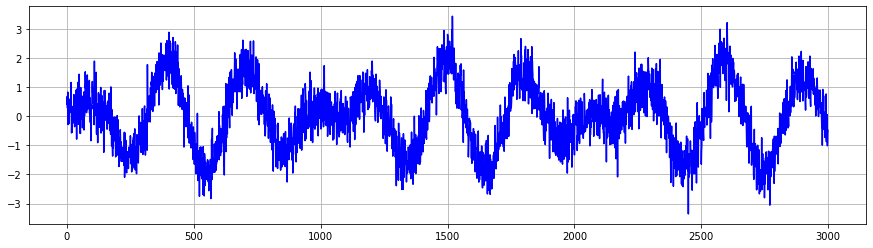

In [10]:
plt.figure(figsize=(15,4))
plt.plot(df, c='blue')
plt.grid(True)
plt.show()

In [11]:
values = df.values
train, test = values[0:Tp ,:], values[Tp:N,:]

In [12]:
print("Train data length:", train.shape)
print("Test data length:", test.shape)

Train data length: (2250, 1)
Test data length: (750, 1)


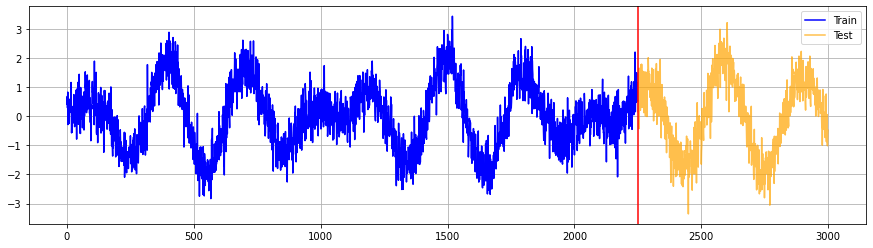

In [13]:
index = df.index.values
plt.figure(figsize=(15,4))
plt.plot(index[0:Tp],train,c='blue')
plt.plot(index[Tp:N],test,c='orange',alpha=0.7)
plt.legend(['Train','Test'])
plt.axvline(df.index[Tp], c="r")
plt.grid(True)
plt.show()

In [14]:
step = 4
np.append(train,np.repeat(train[-1,],step)).shape

(2254,)

In [15]:
step = 4
np.append(train,np.repeat(train[-1,],step)).shape

(2254,)

In [16]:
test = np.append(test, np.repeat(test[-1,],step))
train = np.append(train, np.repeat(train[-1,],step))

In [17]:
print("Train data length:", train.shape)
print("Test data length:", test.shape)

Train data length: (2254,)
Test data length: (754,)


In [19]:
def convert_to_matrix(data, step):
    X, Y = [], []
    for i in range(len(data)-step):
        d = i+step  
        X.append(data[i:d,])
        Y.append(data[d,])
    return np.array(X), np.array(Y)

In [21]:
trainX,trainY = convert_to_matrix(train,step)
testX,testY = convert_to_matrix(test,step)

trainX.shape

(2250, 4)

In [22]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [28]:
def build_simple_rnn(num_units=128, embedding=4, num_dense=32, learning_rate=0.001):
    """
    Builds and compiles a simple RNN model
    Arguments:
              num_units: Number of units of a the simple RNN layer
              embedding: Embedding length - Steps - Tamaño de ventana
              num_dense: Number of neurons in the dense layer followed by the RNN layer
              lr: Learning rate (uses RMSprop optimizer)
    Returns:
              A compiled Keras model.
    """
    model = Sequential()
    model.add(SimpleRNN(units=num_units, input_shape=(1, embedding), activation="relu"))
    model.add(Dense(num_dense, activation="relu"))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer=RMSprop(learning_rate=learning_rate),metrics=['mse'])
    
    return model

In [29]:
model = build_simple_rnn()

In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 128)               17024     
_________________________________________________________________
dense_4 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 21,185
Trainable params: 21,185
Non-trainable params: 0
_________________________________________________________________


In [31]:
class MyCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        if (epoch+1) % 50 == 0 and epoch>0:
            print("Epoch number {} done".format(epoch+1))

In [32]:
batch_size=16
num_epochs = 1000

In [33]:
model.fit(trainX,trainY, 
          epochs=num_epochs, 
          batch_size=batch_size, 
          callbacks=[MyCallback()],verbose=0)

Epoch number 50 done
Epoch number 100 done
Epoch number 150 done
Epoch number 200 done
Epoch number 250 done
Epoch number 300 done
Epoch number 350 done
Epoch number 400 done
Epoch number 450 done
Epoch number 500 done
Epoch number 550 done
Epoch number 600 done
Epoch number 650 done
Epoch number 700 done
Epoch number 750 done
Epoch number 800 done
Epoch number 850 done
Epoch number 900 done
Epoch number 950 done
Epoch number 1000 done


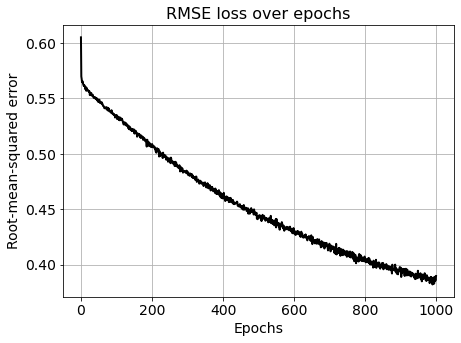

In [34]:
plt.figure(figsize=(7,5))
plt.title("RMSE loss over epochs",fontsize=16)
plt.plot(np.sqrt(model.history.history['loss']),c='k',lw=2)
plt.grid(True)
plt.xlabel("Epochs",fontsize=14)
plt.ylabel("Root-mean-squared error",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

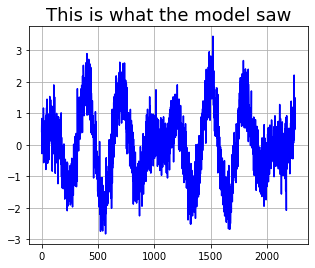

In [35]:
plt.figure(figsize=(5,4))
plt.title("This is what the model saw",fontsize=18)
plt.plot(trainX[:,0][:,0],c='blue')
plt.grid(True)
plt.show()

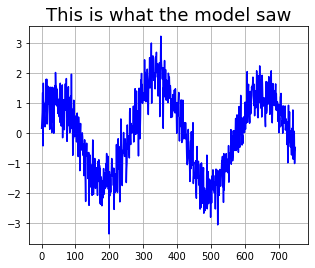

In [36]:
plt.figure(figsize=(5,4))
plt.title("This is what the model saw",fontsize=18)
plt.plot(testX[:,0][:,0],c='blue')
plt.grid(True)
plt.show()

In [37]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
predicted = np.concatenate((trainPredict,testPredict),axis=0)

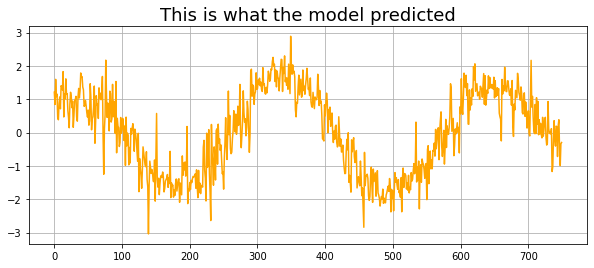

In [38]:
plt.figure(figsize=(10,4))
plt.title("This is what the model predicted",fontsize=18)
plt.plot(testPredict,c='orange')
plt.grid(True)
plt.show()

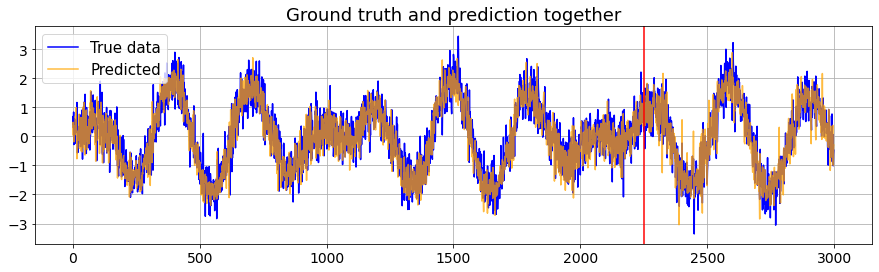

In [39]:
index = df.index.values
plt.figure(figsize=(15,4))
plt.title("Ground truth and prediction together",fontsize=18)
plt.plot(index,df,c='blue')
plt.plot(index,predicted,c='orange',alpha=0.75)
plt.legend(['True data','Predicted'],fontsize=15)
plt.axvline(df.index[Tp], c="r")
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [40]:
error = predicted[Tp:N]-df[Tp:N]
error = np.array(error).ravel()

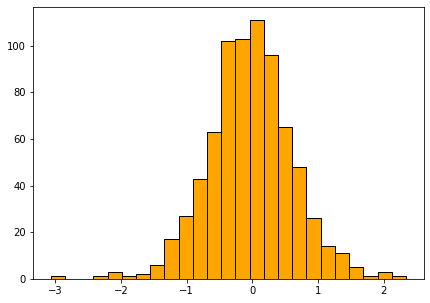

In [41]:
plt.figure(figsize=(7,5))
plt.hist(error,bins=25,edgecolor='k',color='orange')
plt.show()

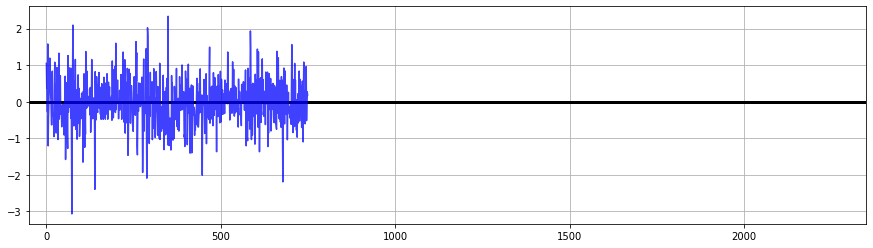

In [42]:
plt.figure(figsize=(15,4))
plt.plot(error,c='blue',alpha=0.75)
plt.hlines(y=0,xmin=-50,xmax=2400,color='k',lw=3)
plt.xlim(-50,2350)
plt.grid(True)
plt.show()

In [43]:
def predictions(model,trainX,testX):
    trainPredict = model.predict(trainX)
    testPredict = model.predict(testX)
    predicted = np.concatenate((trainPredict,testPredict),axis=0)
    
    return predicted

In [44]:
def plot_compare(predicted):
    index = df.index.values
    plt.figure(figsize=(15,4))
    plt.title("Ground truth and prediction together",fontsize=18)
    plt.plot(index,df,c='blue')
    plt.plot(index,predicted,c='orange',alpha=0.75)
    plt.legend(['True data','Predicted'],fontsize=15)
    plt.axvline(df.index[Tp], c="r")
    plt.grid(True)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.show()

In [45]:
def prepare_data(step=4):
    values = df.values
    train, test = values[0:Tp,:], values[Tp:N,:]
    test = np.append(test,np.repeat(test[-1,],step))
    train = np.append(train,np.repeat(train[-1,],step))
    trainX, trainY =convert_to_matrix(train,step)
    testX, testY =convert_to_matrix(test,step)
    trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
    
    return trainX,testX,trainY,testY

In [46]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
def errors(testX, df):
    y_true = df[Tp:N].values
    y_pred = model.predict(testX)
    error = y_pred - y_true
    return [mean_absolute_error(y_true=y_true, y_pred=y_pred)]

Embedding size: 2
Error (mae): [0.2907549528074915]
----------------------------------------------------------------------------------------------------


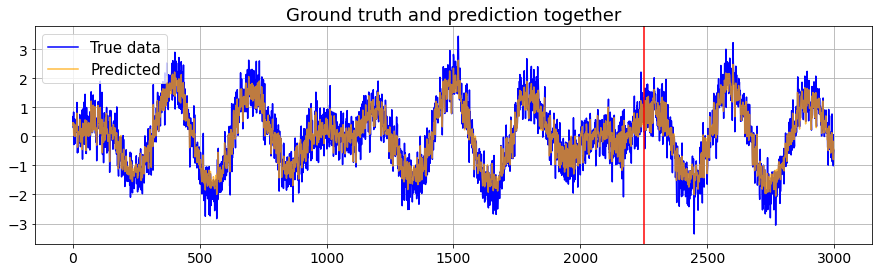


Embedding size: 4
Error (mae): [0.3494793099144002]
----------------------------------------------------------------------------------------------------


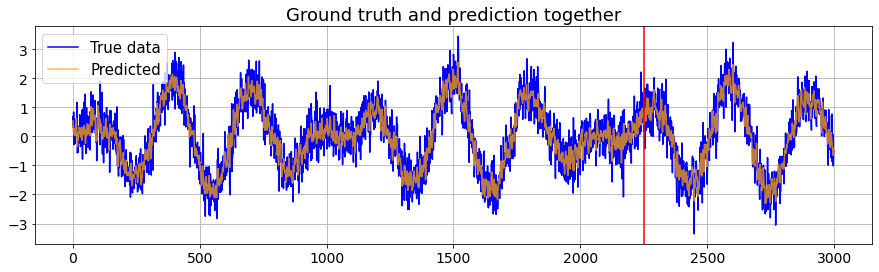


Embedding size: 6
Error (mae): [0.42734210647678805]
----------------------------------------------------------------------------------------------------


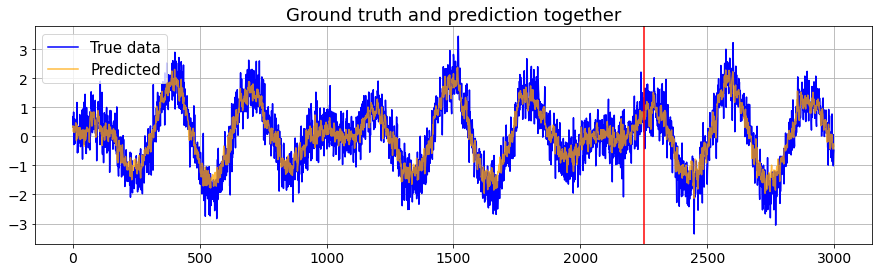


Embedding size: 8
Error (mae): [0.4163344515498092]
----------------------------------------------------------------------------------------------------


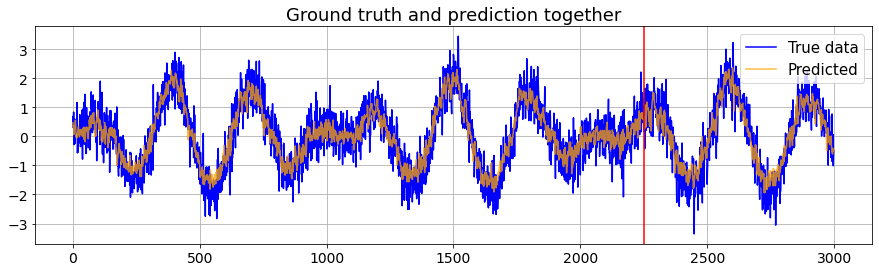


Embedding size: 10
Error (mae): [0.44673947639373135]
----------------------------------------------------------------------------------------------------


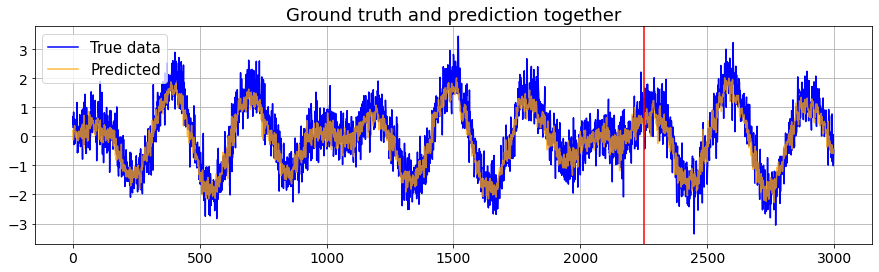


Embedding size: 12
Error (mae): [0.4499639221158698]
----------------------------------------------------------------------------------------------------


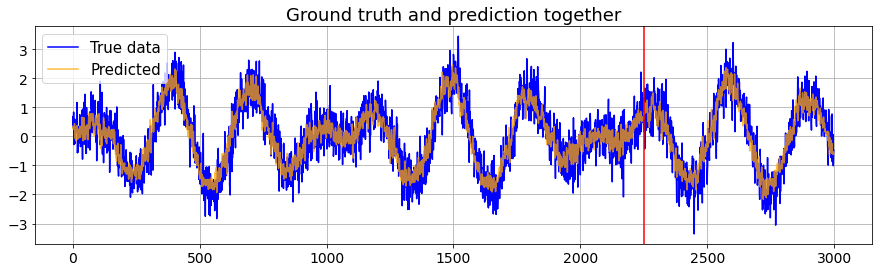

In [47]:
for s in [2,4,6,8,10,12]:  # s = steps  - tamaño ventana
    trainX,testX,trainY,testY = prepare_data(s)
    model = build_simple_rnn(num_units=32,num_dense=8, embedding=s)
    batch_size=16
    num_epochs = 100
    model.fit(trainX,trainY, 
          epochs=num_epochs, 
          batch_size=batch_size,
          verbose=0)
    preds = predictions(model,trainX,testX)
    print("Embedding size: {}".format(s))
    print("Error (mae):", errors(testX, df))
    print("-"*100)
    plot_compare(preds)
    print()

Ran for 100 epochs
Error: [0.28293825609519463]
----------------------------------------------------------------------------------------------------


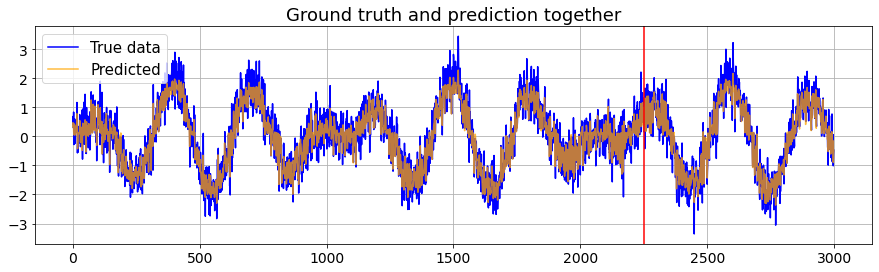


Ran for 200 epochs
Error: [0.30782416624943193]
----------------------------------------------------------------------------------------------------


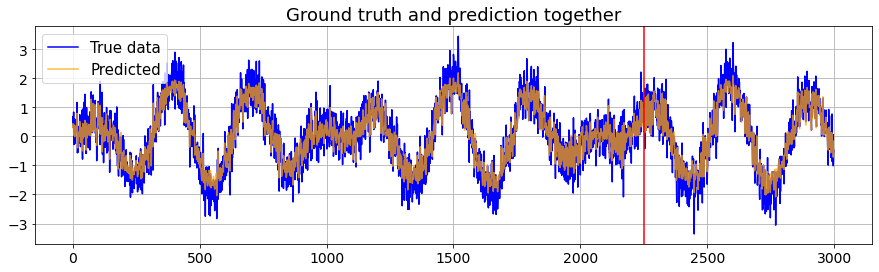


Ran for 300 epochs
Error: [0.31797861013205747]
----------------------------------------------------------------------------------------------------


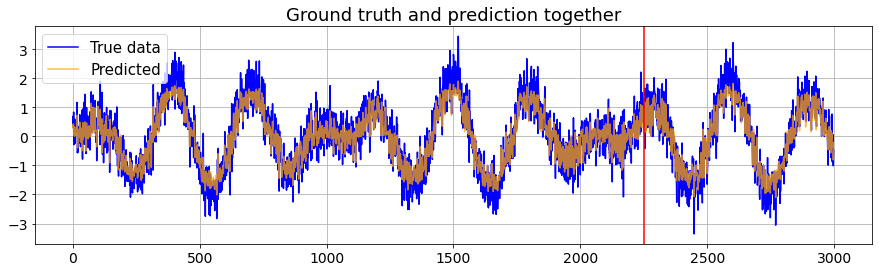


Ran for 400 epochs
Error: [0.30489036644711026]
----------------------------------------------------------------------------------------------------


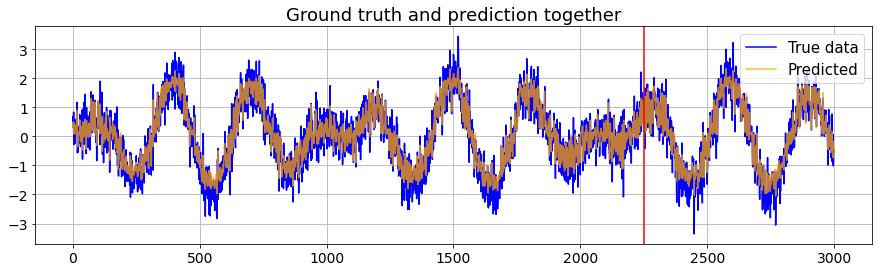


Ran for 500 epochs
Error: [0.3067862125077989]
----------------------------------------------------------------------------------------------------


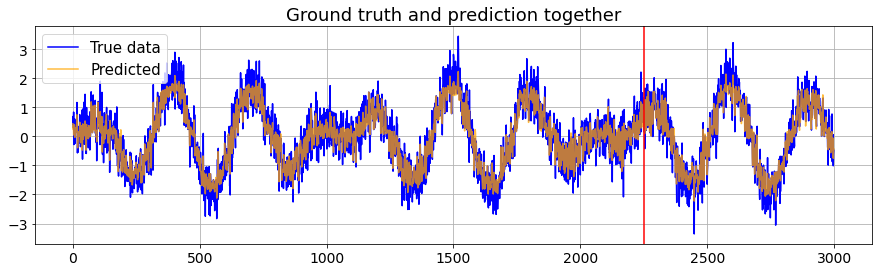

In [49]:
for e in [100,200,300,400,500]:
    trainX, testX, trainY, testY = prepare_data(2)
    model = build_simple_rnn(num_units=32,num_dense=8,embedding=2)
    batch_size=8
    num_epochs = e
    model.fit(trainX,trainY, 
          epochs=num_epochs, 
          batch_size=batch_size,
          verbose=0)
    preds = predictions(model,trainX,testX)
    print("Ran for {} epochs".format(e))
    print("Error:", errors(testX, df))
    print("-"*100)
    plot_compare(preds)
    print()

Ran with batch size: 2
Error: [0.3137577440086624]
----------------------------------------------------------------------------------------------------


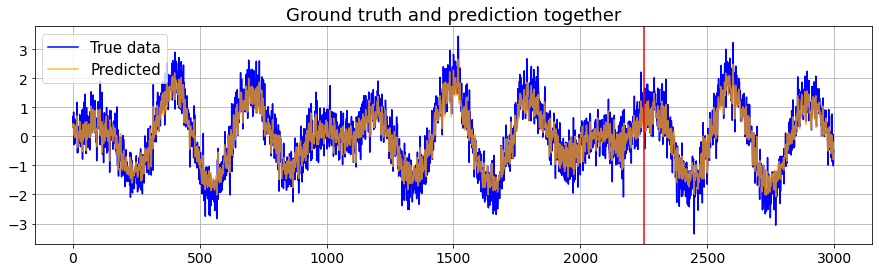


Ran with batch size: 4
Error: [0.29491358381183175]
----------------------------------------------------------------------------------------------------


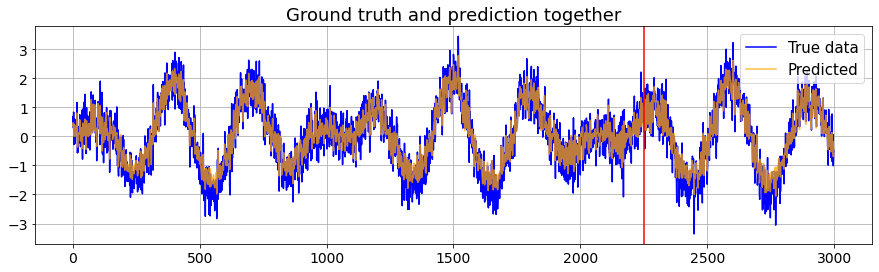


Ran with batch size: 8
Error: [0.28088822687140363]
----------------------------------------------------------------------------------------------------


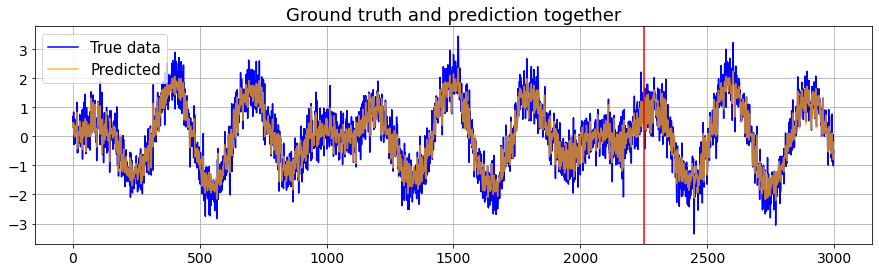


Ran with batch size: 16
Error: [0.29220131190224613]
----------------------------------------------------------------------------------------------------


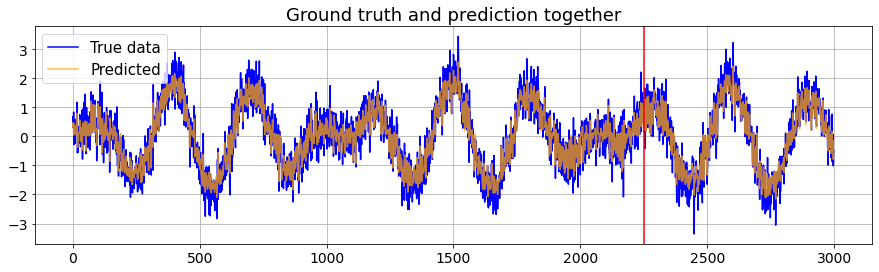


Ran with batch size: 32
Error: [0.29295332618671316]
----------------------------------------------------------------------------------------------------


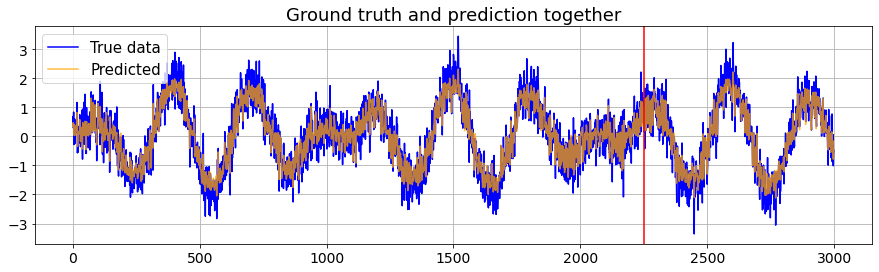


Ran with batch size: 64
Error: [0.28693803885525826]
----------------------------------------------------------------------------------------------------


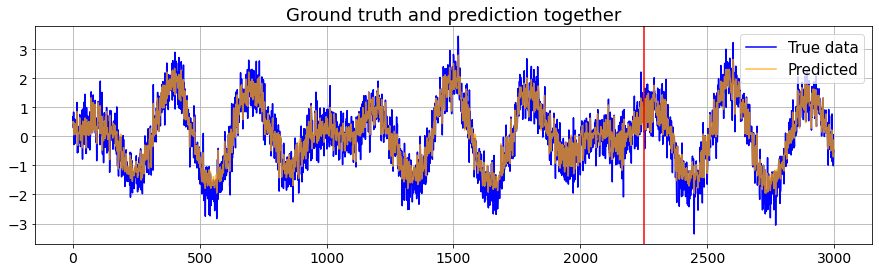

In [51]:
best_step = 2


for b in [2,4,8,16,32,64]:
    trainX,testX,trainY,testY = prepare_data(best_step)
    model = build_simple_rnn(num_units=32,num_dense=8,embedding=best_step)
    batch_size=b
    num_epochs = 100
    model.fit(trainX,trainY, 
          epochs=num_epochs, 
          batch_size=batch_size,
          verbose=0)
    preds = predictions(model,trainX,testX)
    print("Ran with batch size: {}".format(b))
    print("Error:", errors(testX, df))
    print("-"*100)
    plot_compare(preds)
    print()

Best params:

Batch Size 8
Best Step 2
Best Epoch 100
